https://www.kaggle.com/code/pavansanagapati/ensemble-learning-techniques-tutorial

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [4]:
# loading iris dataset 
iris = load_iris() 
X = iris.data[:, :4] 
Y = iris.target 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42) 

In [7]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

In [9]:
# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test)  

In [12]:
# accuracy_score metric to predict Accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

Hard Voting Score  1


In [13]:
# Voting Classifier with soft voting 
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(X_train, y_train) 
y_pred = soft_voting.predict(X_test) 

In [14]:
# Using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score)

Soft Voting Score  1


In [15]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [16]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)

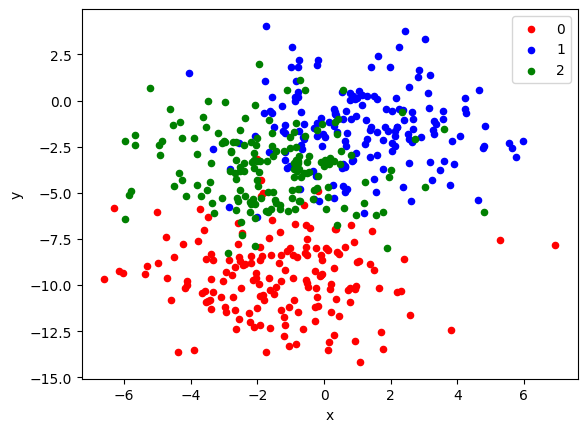

In [17]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42) 

In [21]:
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test) 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

Hard Voting Score  0


In [22]:
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(X_train, y_train) 
y_pred = soft_voting.predict(X_test) 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score)

Soft Voting Score  0
